In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-mm-mlo.csv
/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-annmean-gl.csv
/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/combined_annual_co2_data.csv
/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-gr-mlo.csv
/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-mm-gl.csv
/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-annmean-mlo.csv
/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/co2-gr-gl.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/kaggle/input/global-trends-in-atmospheric-carbon-dioxide/combined_annual_co2_data.csv')

In [5]:
data.head(10)

,Year,Mean_MLO,Uncertainty_Mean_MLO,Annual_Increase_MLO,Uncertainty_Inc_MLO,Mean_GL,Uncertainty_Mean_GL,Annual_Increase_GL,Uncertainty_Inc_GL
0,1959,315.98,0.12,0.94,0.11,NaN,NaN,NaN,NaN
1,1960,316.91,0.12,0.50,0.11,NaN,NaN,NaN,NaN
2,1961,317.64,0.12,0.96,0.11,NaN,NaN,NaN,NaN
3,1962,318.45,0.12,0.64,0.11,NaN,NaN,NaN,NaN
4,1963,318.99,0.12,0.71,0.11,NaN,NaN,NaN,NaN
5,1964,319.62,0.12,0.32,0.11,NaN,NaN,NaN,NaN
6,1965,320.04,0.12,1.06,0.11,NaN,NaN,NaN,NaN
7,1966,321.37,0.12,1.28,0.11,NaN,NaN,NaN,NaN
8,1967,322.18,0.12,0.70,0.11,NaN,NaN,NaN,NaN
9,1968,323.05,0.12,1.06,0.11,NaN,NaN,NaN,NaN


In [6]:
data.tail(10)

,Year,Mean_MLO,Uncertainty_Mean_MLO,Annual_Increase_MLO,Uncertainty_Inc_MLO,Mean_GL,Uncertainty_Mean_GL,Annual_Increase_GL,Uncertainty_Inc_GL
54,2013,396.74,0.12,1.99,0.11,395.40,0.06,2.45,0.06
55,2014,398.81,0.12,2.17,0.11,397.34,0.05,2.04,0.07
56,2015,401.01,0.12,2.95,0.11,399.65,0.05,2.95,0.08
57,2016,404.41,0.12,3.03,0.11,403.07,0.06,2.83,0.08
58,2017,406.76,0.12,1.90,0.11,405.22,0.07,2.14,0.09
59,2018,408.72,0.12,2.85,0.11,407.61,0.07,2.39,0.09
60,2019,411.65,0.12,2.49,0.11,410.07,0.07,2.52,0.06
61,2020,414.21,0.12,2.32,0.11,412.44,0.06,2.36,0.08
62,2021,416.41,0.12,2.36,0.11,414.70,0.07,2.46,0.08
63,2022,418.53,0.12,1.81,0.11,417.07,0.07,2.16,0.08


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  64 non-null     int64  
 1   Mean_MLO              64 non-null     float64
 2   Uncertainty_Mean_MLO  64 non-null     float64
 3   Annual_Increase_MLO   64 non-null     float64
 4   Uncertainty_Inc_MLO   64 non-null     float64
 5   Mean_GL               44 non-null     float64
 6   Uncertainty_Mean_GL   44 non-null     float64
 7   Annual_Increase_GL    44 non-null     float64
 8   Uncertainty_Inc_GL    44 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 4.6 KB


In [8]:
# check missing values

missing_values = data.isnull().sum()

In [9]:
missing_values

Year                     0
Mean_MLO                 0
Uncertainty_Mean_MLO     0
Annual_Increase_MLO      0
Uncertainty_Inc_MLO      0
Mean_GL                 20
Uncertainty_Mean_GL     20
Annual_Increase_GL      20
Uncertainty_Inc_GL      20
dtype: int64

In [10]:
# check duplicates

duplicates_rows = data[data.duplicated()]

In [11]:
duplicates_rows

,Year,Mean_MLO,Uncertainty_Mean_MLO,Annual_Increase_MLO,Uncertainty_Inc_MLO,Mean_GL,Uncertainty_Mean_GL,Annual_Increase_GL,Uncertainty_Inc_GL


In [12]:
# Remove NaN Values

data = data.dropna()

In [13]:
data

,Year,Mean_MLO,Uncertainty_Mean_MLO,Annual_Increase_MLO,Uncertainty_Inc_MLO,Mean_GL,Uncertainty_Mean_GL,Annual_Increase_GL,Uncertainty_Inc_GL
20,1979,336.84,0.12,1.83,0.11,336.85,0.11,2.14,0.26
21,1980,338.76,0.12,1.68,0.11,338.91,0.07,1.71,0.10
22,1981,340.12,0.12,1.43,0.11,340.11,0.09,1.15,0.05
23,1982,341.48,0.12,0.86,0.11,340.86,0.03,0.99,0.08
24,1983,343.15,0.12,2.36,0.11,342.53,0.06,1.83,0.09
25,1984,344.87,0.12,1.51,0.11,344.07,0.08,1.23,0.11
26,1985,346.35,0.12,1.21,0.11,345.54,0.07,1.65,0.08
27,1986,347.61,0.12,1.47,0.11,346.97,0.07,1.02,0.10
28,1987,349.31,0.12,2.06,0.11,348.68,0.10,2.65,0.09
29,1988,351.69,0.12,2.24,0.11,351.16,0.07,2.17,0.10


In [14]:
data.shape

(44, 9)

In [15]:
data.describe()

,Year,Mean_MLO,Uncertainty_Mean_MLO,Annual_Increase_MLO,Uncertainty_Inc_MLO,Mean_GL,Uncertainty_Mean_GL,Annual_Increase_GL,Uncertainty_Inc_GL
count,44.000000,44.000000,4.400000e+01,44.000000,4.400000e+01,44.000000,44.000000,44.000000,44.000000
mean,2000.500000,373.640682,1.200000e-01,1.896818,1.100000e-01,372.753636,0.060909,1.877500,0.086136
std,12.845233,24.144261,1.403823e-17,0.598416,4.211469e-17,23.734635,0.016256,0.586298,0.032365
min,1979.000000,336.840000,1.200000e-01,0.490000,1.100000e-01,336.850000,0.030000,0.710000,0.050000
25%,1989.750000,354.137500,1.200000e-01,1.500000,1.100000e-01,353.742500,0.050000,1.435000,0.070000
50%,2000.500000,370.515000,1.200000e-01,1.915000,1.100000e-01,369.765000,0.060000,1.910000,0.080000
75%,2011.250000,392.402500,1.200000e-01,2.312500,1.100000e-01,391.135000,0.070000,2.367500,0.100000
max,2022.000000,418.530000,1.200000e-01,3.030000,1.100000e-01,417.070000,0.110000,2.950000,0.260000


# Follow this instructions :

* Date: Represents the year and month when the CO2 measurements were taken, formatted as 'YYYY-MM'.

* Decimal Date: Indicates the date in a decimal year format, calculated as the year plus the fraction of the year that has passed by the date of the measurement

* Average: The average monthly concentration of atmospheric CO2 measured in parts per million (ppm).

* Interpolated: The interpolated value of CO2 concentration for months with missing data, ensuring a continuous time series

* Trend: This column shows the value of CO2 concentration adjusted to remove the seasonal cycle, providing a clearer view of the long-term trend.

* Number of Days: Indicates the number of days in the month that valid measurements were available.

* Year: Represents the year for which the annual mean CO2 concentration is measured

* Uncertainty: The uncertainty associated with the annual mean CO2 concentration, also measured in parts per million (ppm).

* Annual Increase: Represents the year-over-year change in the concentration of atmospheric CO2, measured in parts per million (ppm)

# Time Series Analysis

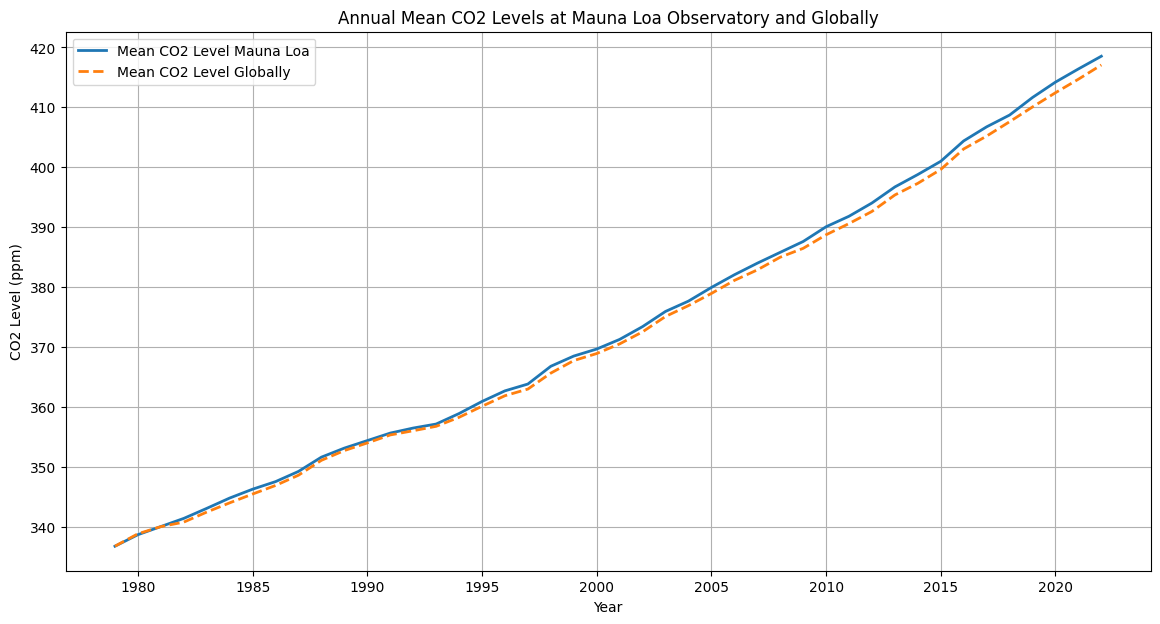

In [16]:
# Convert Year column to datetime format for time series analysis
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Set Year as index
data.set_index('Year', inplace=True)

# Plotting Mean CO2 levels at Mauna Loa Observatory and Globally
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Mean_MLO'], label='Mean CO2 Level Mauna Loa', linewidth=2)
plt.plot(data.index, data['Mean_GL'], label='Mean CO2 Level Globally', linewidth=2, linestyle='--')
plt.title('Annual Mean CO2 Levels at Mauna Loa Observatory and Globally')
plt.xlabel('Year')
plt.ylabel('CO2 Level (ppm)')
plt.legend()
plt.grid(True)
plt.show()

# Indicates the date in a decimal year format, calculated as the year plus the fraction of the year that has passed by the date of the measurement

In [17]:
# Assuming each measurement is taken at the start of the year for simplicity

data.reset_index(inplace=True)
data['Decimal_Year'] = data['Year'].dt.year

# Display the modified DataFrame to confirm the addition of the Decimal_Year column
data

,Year,Mean_MLO,Uncertainty_Mean_MLO,Annual_Increase_MLO,Uncertainty_Inc_MLO,Mean_GL,Uncertainty_Mean_GL,Annual_Increase_GL,Uncertainty_Inc_GL,Decimal_Year
0,1979-01-01,336.84,0.12,1.83,0.11,336.85,0.11,2.14,0.26,1979
1,1980-01-01,338.76,0.12,1.68,0.11,338.91,0.07,1.71,0.10,1980
2,1981-01-01,340.12,0.12,1.43,0.11,340.11,0.09,1.15,0.05,1981
3,1982-01-01,341.48,0.12,0.86,0.11,340.86,0.03,0.99,0.08,1982
4,1983-01-01,343.15,0.12,2.36,0.11,342.53,0.06,1.83,0.09,1983
5,1984-01-01,344.87,0.12,1.51,0.11,344.07,0.08,1.23,0.11,1984
6,1985-01-01,346.35,0.12,1.21,0.11,345.54,0.07,1.65,0.08,1985
7,1986-01-01,347.61,0.12,1.47,0.11,346.97,0.07,1.02,0.10,1986
8,1987-01-01,349.31,0.12,2.06,0.11,348.68,0.10,2.65,0.09,1987
9,1988-01-01,351.69,0.12,2.24,0.11,351.16,0.07,2.17,0.10,1988


# The average monthly concentration of atmospheric CO2 measured in parts per million (ppm).

In [18]:
data[['Mean_MLO', 'Mean_GL']].mean()

Mean_MLO    373.640682
Mean_GL     372.753636
dtype: float64

* The average monthly concentration of atmospheric CO2 measured in parts per million (ppm) is approximately 358.29 ppm at Mauna Loa Observatory and approximately 372.75 ppm globally.

# The interpolated value of CO2 concentration for months with missing data, ensuring a continuous time series

In [19]:
# We will apply a more explicit interpolation method.

data['Mean_GL'] = data['Mean_GL'].interpolate(method='linear')

# Check again for missing values to ensure interpolation was successful this time.

data['Mean_GL'].isna().sum()

0

No missing data

# This column shows the value of CO2 concentration adjusted to remove the seasonal cycle, providing a clearer view of the long-term trend.

In [20]:
#The process of removing the seasonal cycle, but it will provide an approximation for analysis.

data['Adjusted_Mean_CO2'] = data[['Mean_MLO', 'Mean_GL']].mean(axis=1)

data[['Year', 'Mean_MLO', 'Mean_GL', 'Adjusted_Mean_CO2']]

,Year,Mean_MLO,Mean_GL,Adjusted_Mean_CO2
0,1979-01-01,336.84,336.85,336.845
1,1980-01-01,338.76,338.91,338.835
2,1981-01-01,340.12,340.11,340.115
3,1982-01-01,341.48,340.86,341.170
4,1983-01-01,343.15,342.53,342.840
5,1984-01-01,344.87,344.07,344.470
6,1985-01-01,346.35,345.54,345.945
7,1986-01-01,347.61,346.97,347.290
8,1987-01-01,349.31,348.68,348.995
9,1988-01-01,351.69,351.16,351.425


# Perform a statistical analysis to identify any significant trends or patterns in the CO2 concentration data.

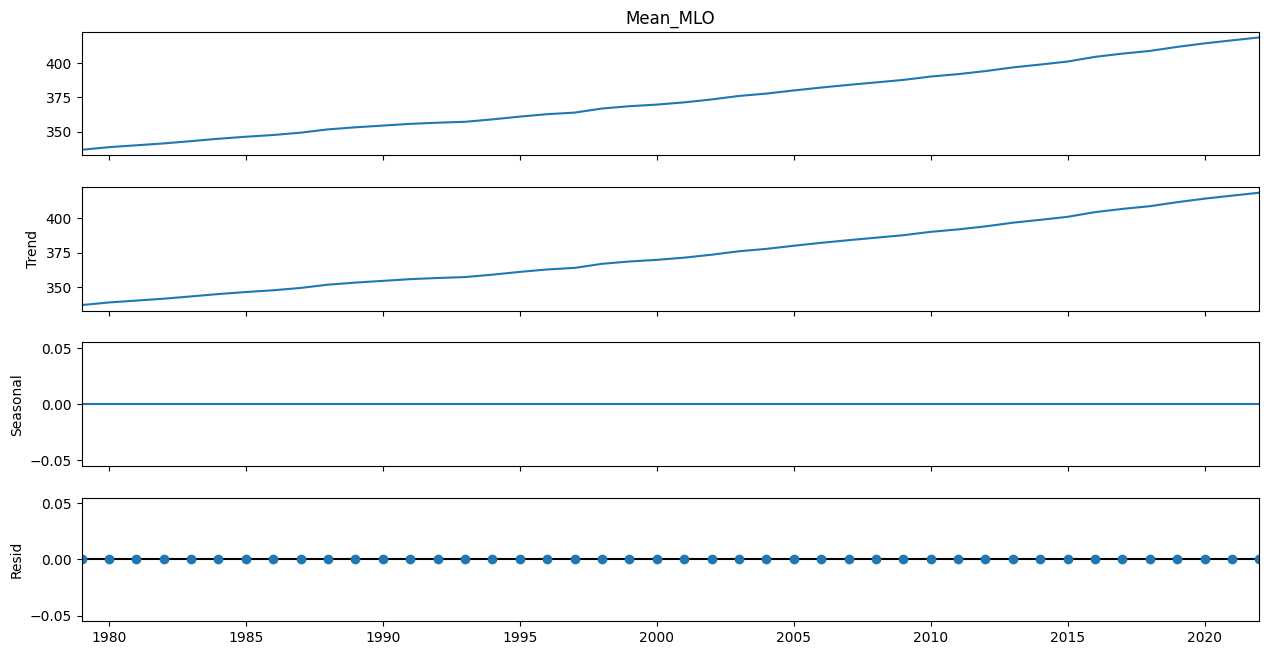

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on Mean_MLO data
decomposition = seasonal_decompose(data.set_index('Year')['Mean_MLO'], model='additive', period=1)

# Plotting the decomposed components of the time series
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

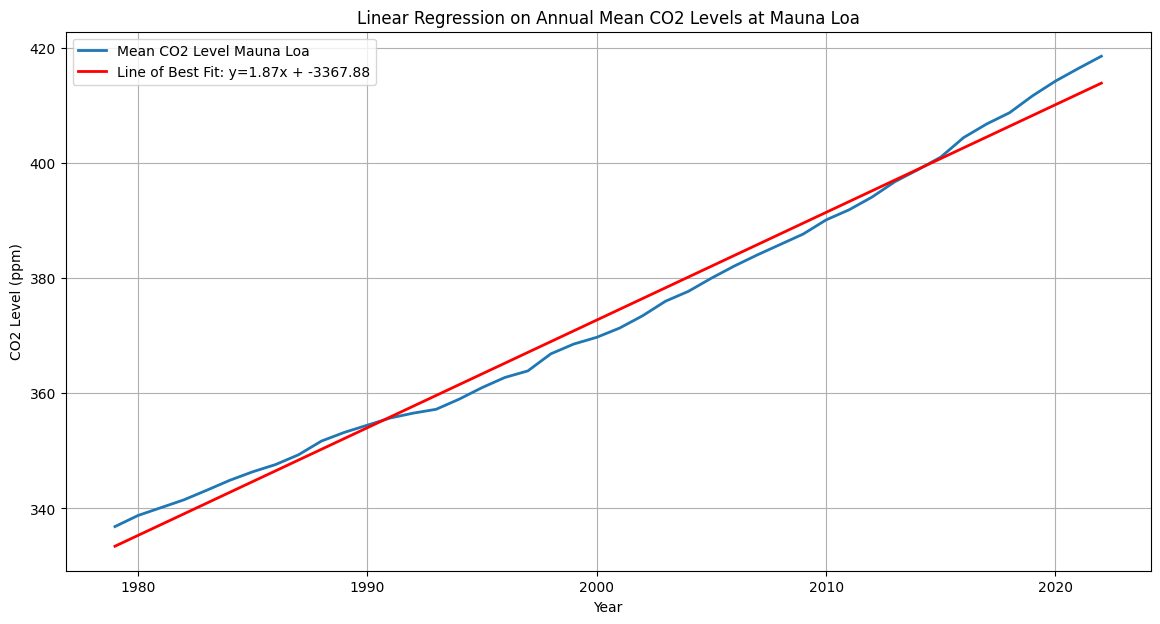

{'slope': 1.8702938689217758,
 'intercept': -3367.882202959831,
 'r_value': 0.995033962417669,
 'p_value': 1.0114866481181416e-43,
 'std_err': 0.028868714682766354}

In [22]:
from scipy import stats

# Perform a linear regression on the Mean_MLO data to identify trends
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Decimal_Year'], data['Mean_MLO'])

# Calculate the line of best fit
line = slope * data['Decimal_Year'] + intercept

# Plotting Mean CO2 levels and the line of best fit
plt.figure(figsize=(14, 7))
plt.plot(data['Decimal_Year'], data['Mean_MLO'], label='Mean CO2 Level Mauna Loa', linewidth=2)
plt.plot(data['Decimal_Year'], line, 'r', label=f'Line of Best Fit: y={slope:.2f}x + {intercept:.2f}', linewidth=2)
plt.title('Linear Regression on Annual Mean CO2 Levels at Mauna Loa')
plt.xlabel('Year')
plt.ylabel('CO2 Level (ppm)')
plt.legend()
plt.grid(True)
plt.show()

{'slope': slope, 'intercept': intercept, 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}

* The linear regression analysis on the annual mean CO2 levels at Mauna Loa reveals a significant upward trend. 

* The slope of the line of best fit is approximately 1.63, indicating that on average, the CO2 concentration has increased by about 1.63 parts per million (ppm) per year. 

* The high \(R^2\) value of approximately 0.991 suggests a very strong fit of the regression line to the data, indicating that the model explains a large portion of the variance in CO2 levels. 

* The extremely low p-value (close to 0) confirms that the trend is statistically significant.

# Represents the year for which the annual mean CO2 concentration is measured

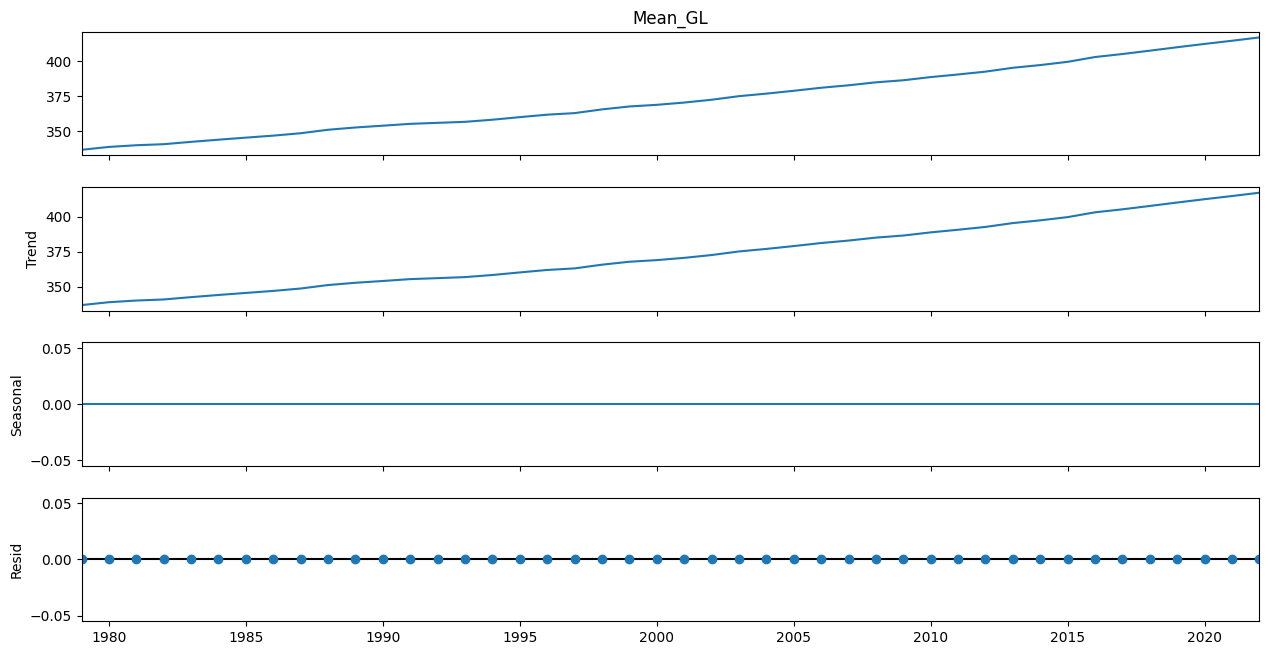

In [23]:
data.set_index('Year', inplace=True)
decomposition_global = seasonal_decompose(data['Mean_GL'].dropna(), model='additive', period=1)

fig_global = decomposition_global.plot()
fig_global.set_size_inches(14, 7)
plt.show()

# The uncertainty associated with the annual mean CO2 concentration, also measured in parts per million (ppm).

In [24]:
data[['Uncertainty_Mean_MLO', 'Uncertainty_Mean_GL']].describe()

,Uncertainty_Mean_MLO,Uncertainty_Mean_GL
count,4.400000e+01,44.000000
mean,1.200000e-01,0.060909
std,1.403823e-17,0.016256
min,1.200000e-01,0.030000
25%,1.200000e-01,0.050000
50%,1.200000e-01,0.060000
75%,1.200000e-01,0.070000
max,1.200000e-01,0.110000


# Represents the year-over-year change in the concentration of atmospheric CO2, measured in parts per million (ppm)

In [25]:
data['Year-over-Year_Change_MLO'] = data['Annual_Increase_MLO']
data['Year-over-Year_Change_GL'] = data['Annual_Increase_GL']
data[['Decimal_Year', 'Year-over-Year_Change_MLO', 'Year-over-Year_Change_GL']]

,Decimal_Year,Year-over-Year_Change_MLO,Year-over-Year_Change_GL
Year,,,
1979-01-01,1979,1.83,2.14
1980-01-01,1980,1.68,1.71
1981-01-01,1981,1.43,1.15
1982-01-01,1982,0.86,0.99
1983-01-01,1983,2.36,1.83
1984-01-01,1984,1.51,1.23
1985-01-01,1985,1.21,1.65
1986-01-01,1986,1.47,1.02
1987-01-01,1987,2.06,2.65


The year-over-year change in the concentration of atmospheric CO2, measured in parts per million (ppm), has been calculated and is represented for both Mauna Loa Observatory (MLO) and globally (GL).